In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"
strong_purple = "#9E5BD5"
middle_blue = "#61BDF7"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#4569BB"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [2]:
# import networkx as nx
# import matplotlib.pyplot as plt
#
# # Define the search trajectory as a tree-like structure
# search_trajectory = {
#     '0': ['1', '2', '3'],
#     '1': ['4', '5'],
#     '2': ['6'],
#     '3': ['7', '8'],
#     '4': ['9'],
#     '5': ['10'],
#     '6': ['11', '12'],
#     '7': ['13'],
#     '8': ['14'],
#     '9': [],
#     '10': [],
#     '11': [],
#     '12': [],
#     '13': [],
#     '14': []
# }
#
# # Create a directed graph using networkx
# G = nx.DiGraph(search_trajectory)
#
# # Create a figure and axis
# fig, ax = plt.subplots()
#
# # Set the layout of the graph (e.g., 'shell', 'spring', 'spectral', 'random', etc.)
# pos = nx.shell_layout(G)
#
# # Draw the nodes and edges of the graph
# nx.draw_networkx_nodes(G, pos, ax=ax, node_size=500, node_color='lightblue', alpha=0.9)
# nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', arrows=True)
#
# # Set the labels for the nodes
# node_labels = {node: node for node in G.nodes}
# nx.draw_networkx_labels(G, pos, ax=ax, labels=node_labels)
#
# # Set the title
# plt.title('Search Trajectory Visualization')
#
# # Show the plot
# plt.show()


In [3]:
# import random
# import numpy as np
# from Landscape import Landscape
# from Agent import Agent
# np.random.seed(1000)
# search_iteration = 100
# N = 10
# K = 9
# state_num = 4
# generalist_expertise = 20
# specialist_expertise = 0
# landscape = Landscape(N=N, K=K, state_num=state_num, alpha=0.5)
# # landscape.describe()
# agent = Agent(N=N, landscape=landscape, state_num=state_num,
#                 generalist_expertise=generalist_expertise, specialist_expertise=specialist_expertise)
# # agent.describe()
# trajectory = []
# for _ in range(search_iteration):
#     agent.search()
#     position = [int(i) for i in agent.state]
#     trajectory.append(position)

# import matplotlib.pyplot as plt
# x = range(len(agent.fitness_across_time))
# plt.plot(x, agent.fitness_across_time, "k-", label="Fitness")
# plt.plot(x, agent.cog_fitness_across_time, "k--", label="Cognitive Fitness")
# plt.title('Performance at N={0}, K={1}, G={2}, S={3}'.format(N, K, generalist_expertise, specialist_expertise))
# plt.xlabel('Iteration', fontweight='bold', fontsize=10)
# plt.ylabel('Performance', fontweight='bold', fontsize=10)
# # plt.xticks(x)
# plt.legend(frameon=False, fontsize=10)
# plt.savefig("G_performance_K{0}.png".format(K), transparent=True, dpi=200)
# plt.show()

In [9]:
# Import Trajectory Data
data_folder = r"E:\data\gst-0710-23\N9\Baseline\Trakectory"

search_iteration = 50
N = 9
K_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
G_trajectory_list, S_trajectory_list = [], []
G_layer_info_list, S_layer_info_list = [], []
for K in K_list:
    with open(data_folder + r"\G_nodes_relation_int_K_{0}".format(K), "rb") as infile:
        G_trajectory_list.append(pickle.load(infile))
    with open(data_folder + r"\G_layer_info_K_{0}".format(K), "rb") as infile:
        G_layer_info_list.append(pickle.load(infile))
    with open(data_folder + r"\S_nodes_relation_int_K_{0}".format(K), "rb") as infile:
        S_trajectory_list.append(pickle.load(infile))
    with open(data_folder + r"\S_layer_info_K_{0}".format(K), "rb") as infile:
        S_layer_info_list.append(pickle.load(infile))

In [10]:
print(len(G_trajectory_list[1]))
print(len(G_layer_info_list))

4096
9


In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as colors
#
# # Generate random positions and fitness values
# num_positions = search_iteration
# num_dimensions = N
# trajectory = G_trajectory_list[0]
# # Needed info: positions, fitness, cog_fitness
# positions = np.array(trajectory, dtype=int)
# fitness_values = agent.fitness_across_time
# cog_fitness_values = agent.cog_fitness_across_time
#
# # Create a colormap for the heatmap
# # cmap = cm.get_cmap('viridis', 4)  # 4 colors for values 0, 1, 2, 3
# cmap = colors.ListedColormap([shallow_blue, deep_blue, shallow_pink, deep_pink])
#
# # Create the figure and two subplots
# fig, ax1 = plt.subplots(figsize=(10, 6))
# ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis with ax1
#
# # Set aspect ratio to 'auto' for proper proportions
# im = ax1.imshow(positions.T, cmap=cmap, aspect='auto', extent=[-0.5, num_positions - 0.5, -0.5, num_dimensions - 0.5])
#
# # Plot the fitness values as a line graph on the second y-axis
# ax2.plot(range(num_positions), fitness_values, color='k', label="Fitness")
# plt.plot(range(num_positions), cog_fitness_values, "k--", label="Cognitive Fitness")
#
# # Set tick labels and limits for the x-axis
# # x_ticks = np.arange(0, num_positions, 5)
# # ax1.set_xticks(x_ticks)
# # ax1.set_xticklabels(x_ticks)
#
# # Set tick labels and limits for the y-axis (position dimension)
# y_ticks = np.arange(num_dimensions)
# ax1.set_yticks(y_ticks)
# ax1.set_yticklabels(y_ticks)
# ax1.set_ylim([-0.5, num_dimensions - 0.5])
#
# # Set tick labels and limits for the second y-axis (fitness values)
# ax2.set_ylabel('Fitness Value')
# # ax2.set_ylim([0, 1])
#
# # Add colorbar
# cbar = fig.colorbar(im, ax=ax2, pad=0.08)  # Adjust the pad value as needed
# cbar.set_ticks([0.375, 1.125, 1.875, 2.625])  # Center the colorbar ticks
# cbar.set_ticklabels(['0', '1', '2', '3'])
#
# # Add labels and title
# ax1.set_xlabel('Search Iteration')
# ax1.set_ylabel('Dimension')
# ax1.set_title('Search Trajectory Heatmap with Fitness Plot')
#
# # Adjust spacing to accommodate the second y-axis label and colorbar
# fig.tight_layout()
#
# # Display the heatmap and fitness plot
# plt.savefig("G_Trajectory_K{0}.png".format(K), transparent=False, dpi=300)
# plt.show()


NameError: name 'trajectory' is not defined

In [ ]:
# import random
# import numpy as np
# from Landscape import Landscape
# from Agent import Agent
# np.random.seed(1000)
# search_iteration = 100
# N = 10
# K = 9
# state_num = 4
# generalist_expertise = 0
# specialist_expertise = 20
# landscape = Landscape(N=N, K=K, state_num=state_num, alpha=0.5)
# # landscape.describe()
# agent = Agent(N=N, landscape=landscape, state_num=state_num,
#                 generalist_expertise=generalist_expertise, specialist_expertise=specialist_expertise)
# # agent.describe()
# trajectory = []
# for _ in range(search_iteration):
#     agent.search()
#     position = [int(i) for i in agent.state]
#     trajectory.append(position)

In [ ]:
# import matplotlib.pyplot as plt
# x = range(len(agent.fitness_across_time))
# plt.plot(x, agent.fitness_across_time, "k-", label="Fitness")
# plt.plot(x, agent.cog_fitness_across_time, "k--", label="Cognitive Fitness")
# plt.title('Performance at N={0}, K={1}, G={2}, S={3}'.format(N, K, generalist_expertise, specialist_expertise))
# plt.xlabel('Iteration', fontweight='bold', fontsize=10)
# plt.ylabel('Performance', fontweight='bold', fontsize=10)
# # plt.xticks(x)
# plt.legend(frameon=False, fontsize=10)
# plt.savefig("S_performance_K{0}.png".format(K), transparent=True, dpi=200)
# plt.show()
# # print(trajectory)

In [8]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as colors
#
# # Generate random positions and fitness values
# num_positions = search_iteration
# num_dimensions = N
# positions = np.array(trajectory, dtype=int)
# fitness_values = agent.fitness_across_time
# cog_fitness_values = agent.cog_fitness_across_time
#
# # Create a colormap for the heatmap
# # cmap = cm.get_cmap('viridis', 4)  # 4 colors for values 0, 1, 2, 3
# cmap = colors.ListedColormap([shallow_blue, deep_blue, shallow_pink, deep_pink])
#
# # Create the figure and two subplots
# fig, ax1 = plt.subplots(figsize=(10, 6))
# ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis with ax1
#
# # Set aspect ratio to 'auto' for proper proportions
# im = ax1.imshow(positions.T, cmap=cmap, aspect='auto', extent=[-0.5, num_positions - 0.5, -0.5, num_dimensions - 0.5])
#
# # Plot the fitness values as a line graph on the second y-axis
# ax2.plot(range(num_positions), fitness_values, color='k', label="Fitness")
# plt.plot(range(num_positions), cog_fitness_values, "k--", label="Cognitive Fitness")
#
# # Set tick labels and limits for the x-axis
# # x_ticks = np.arange(0, num_positions, 5)
# # ax1.set_xticks(x_ticks)
# # ax1.set_xticklabels(x_ticks)
#
# # Set tick labels and limits for the y-axis (position dimension)
# y_ticks = np.arange(num_dimensions)
# ax1.set_yticks(y_ticks)
# ax1.set_yticklabels(y_ticks)
# ax1.set_ylim([-0.5, num_dimensions - 0.5])
#
# # Set tick labels and limits for the second y-axis (fitness values)
# ax2.set_ylabel('Fitness Value')
# # ax2.set_ylim([0, 1])
#
# # Add colorbar
# cbar = fig.colorbar(im, ax=ax2, pad=0.08)  # Adjust the pad value as needed
# cbar.set_ticks([0.375, 1.125, 1.875, 2.625])  # Center the colorbar ticks
# cbar.set_ticklabels(['0', '1', '2', '3'])
#
# # Add labels and title
# ax1.set_xlabel('Search Iteration')
# ax1.set_ylabel('Dimension')
# ax1.set_title('Search Trajectory Heatmap with Fitness Plot')
#
# # Adjust spacing to accommodate the second y-axis label and colorbar
# fig.tight_layout()
#
# # Display the heatmap and fitness plot
# plt.savefig("S_Trajectory_K{0}.png".format(K), transparent=False, dpi=300)
# plt.show()


NameError: name 'trajectory' is not defined

In [ ]:
# # Depth-first algorithm to record all the trajectories
# class Agent:
#     def __init__(self, current_position):
#         self.current_position = current_position
#         self.path = [current_position]
#
#     def move(self, new_position):
#         self.current_position = new_position
#         self.path.append(new_position)
#
# def search_fitness_landscape(agent, fitness_landscape):
#     current_position = agent.current_position
#     fitness = fitness_landscape[current_position]
#
#     if fitness == goal_fitness:
#         # Reached the goal fitness, record the current path
#         all_paths.append(agent.path[:])
#         return
#
#     neighbors = get_neighbors(current_position)
#
#     for neighbor in neighbors:
#         neighbor_fitness = fitness_landscape[neighbor]
#
#         if neighbor_fitness >= fitness:
#             # Move to the neighbor with equal or higher fitness
#             agent.move(neighbor)
#             search_fitness_landscape(agent, fitness_landscape)
#             agent.move(current_position)  # Backtrack to the previous position
#
# # Example usage
# fitness_landscape = {
#     'A': 1,
#     'B': 2,
#     'C': 3,
#     'D': 4,
#     'E': 5,
# }
#
# goal_fitness = 5
# all_paths = []
#
# start_position = 'A'
# agent = Agent(start_position)
# search_fitness_landscape(agent, fitness_landscape)
#
# # Print all recorded paths
# for path in all_paths:
#     print(path)


NetworkXError: Node 169177 has no position.

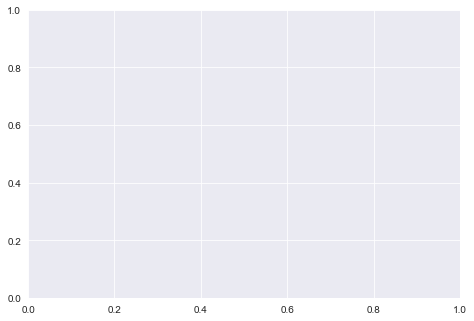

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Dataset
# dataset = {
#     "0000": ["0001", "0010", "0100"],
#     "0001": ["0010", "0100"],
#     "0010": ["0000", "0001", "0100", "1000"],
#     "0011": ["0000", "0100", "1001"],
#     "0100": ["0000", "0001", "0010", "0011"],
#     "0101": ["0010", "0110"],
#     "0110": ["0100", "0101"],
#     "0111": ["0010", "0100", "0101", "1001"],
#     "1000": ["0010", "1010"],
#     "1001": ["0011", "0111", "1101"],
# }
node_relation = G_trajectory_list[0]
layer_info_int = G_layer_info_list[0]
# Convert strings to integers
# int_dataset = {}
# for node, edges in dataset.items():
#     int_node = int(node, 4)
#     int_edges = [int(edge, 4) for edge in edges]
#     int_dataset[int_node] = int_edges

# Create graph
G = nx.Graph()
for node, edges in node_relation.items():
    G.add_node(node)
    for edge in edges:
        G.add_edge(node, edge)

# Create a dictionary to store the node positions for each layer
layer_positions = {layer: [] for layer in range(max(layer_info_int.values()) + 1)}

# Assign node positions within each layer
for node, layer in layer_info_int.items():
    layer_positions[layer].append(node)

# Calculate the x-coordinate for each node within its layer; -> Layer Information
layer_width = 1.0 / (len(layer_positions) + 1)  # Width of each layer column
node_positions = {}
for layer, nodes in layer_positions.items():
    x = (layer + 1) * layer_width  # x-coordinate for the layer
    y_step = 1.0 / (len(nodes) + 1)  # Vertical spacing between nodes in the layer
    for i, node in enumerate(nodes):
        y = (i + 1) * y_step  # y-coordinate for the node
        node_positions[node] = (x, y)

# Identify nodes without outward links
nodes_without_links = [node for node in G.nodes if node_relation[node] == []] # each key have the follow-up nodes

# Set the node positions as node attributes
nx.set_node_attributes(G, node_positions, 'pos')
# Visualize the graph
pos = nx.get_node_attributes(G, 'pos')

# Set the node color for nodes without outward links to red
node_color = ['red' if node in nodes_without_links else 'lightblue' for node in G.nodes]

nx.draw(G, pos, with_labels=False, node_color=node_color, node_size=500, edge_color='gray')

# Draw the node labels
# labels = nx.draw_networkx_labels(G, pos, font_color='black')
#
# # Automatically adjust the positions of the node labels to prevent overlap
# adjust_text(list(labels.values()), autoalign='xy', only_move={'points': 'xy'})

# nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title("Network Visualization with Layers")
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
import random

import matplotlib.pyplot as plt
import networkx as nx


GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher

print(nx.graph_atlas_g()[0])

def atlas6():
    """Return the atlas of all connected graphs with at most 6 nodes"""

    Atlas = nx.graph_atlas_g()[3:100]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U

G = atlas6()

print(G)
print(nx.number_connected_components(G), "connected components")

plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()

In [ ]:
# heatmap figure to replace the 3D surface
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = np.linspace(0, 10, 100)  # Values of x
y = np.linspace(0, 5, 50)    # Values of y
X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
z = np.sin(X) + np.cos(Y)    # Compute the values of z based on x and y
# Create the 2D color plot
plt.pcolormesh(x, y, z, cmap='jet')
plt.colorbar()  # Add a colorbar for reference

# Set the axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Color Plot')

# Display the plot
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some sample data
x = np.linspace(0, 10, 100)  # Values of x
y = np.linspace(0, 5, 50)    # Values of y
X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
z = np.sin(X) + np.cos(Y)    # Compute the values of z based on x and y

# Create the 2D heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.heatmap(z, cmap='viridis')

# Reduce the number of x-axis and y-axis tick labels
x_ticks = np.arange(0, len(x), 10)  # Display every 10th x tick
y_ticks = np.arange(0, len(y), 5)   # Display every 5th y tick
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels([f'{x_val:.1f}' for x_val in x[x_ticks]], rotation=45)
ax.set_yticklabels([f'{y_val:.1f}' for y_val in y[y_ticks]], rotation=0)

# Set the axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Heatmap with Reduced Tick Labels using Seaborn')

# Display the plot
plt.tight_layout()
plt.show()
